# What is the True Normal Human Body Temperature? By Robert M Joseph

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<div class="span5 alert alert-info">
<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****
</div>

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('data/human_body_temperature.csv')

In [118]:
df.head(5)

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [35]:
df.describe()

,temperature,heart_rate
count,130.000000,130.000000
mean,98.249231,73.761538
std,0.733183,7.062077
min,96.300000,57.000000
25%,97.800000,69.000000
50%,98.300000,74.000000
75%,98.700000,79.000000
max,100.800000,89.000000


# 1. Is the distribution of body temperatures normal? 
Though the distribution does not seem to be perfectly normal, based on the histogram one can say that the distribution can be approximated by the normal.

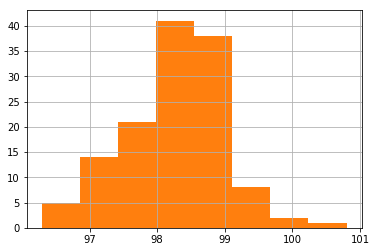

In [121]:
df['temperature'].hist(bins=8)
plt.show()

# 2. Is the sample size large? Are the observations independent? 
Based on the definition of a large sample size being 30 obsevations, this is a large sample size consisting of 130 observations. The observations seem to exhibit independence based on the plot of observations and temperatures.

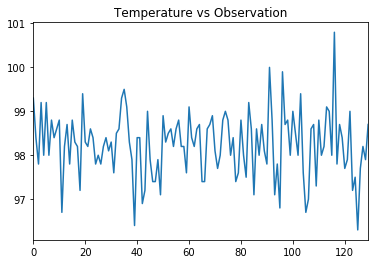

In [133]:
df['temperature'].plot(title='Temperature vs Observation')
plt.show()

# 3. Is the true population mean really 98.6 degrees F? 
According to the significance test we can be 99% certain that the population mean lies between 98.0833253738 and 98.4151361647.

a. I would use a one-sample test since the question is concerned with the population, in general, and not a grouping by sex.

b. It is appropriate to use the z-statistic due to the sample size being large.

c. The result using the t-statistic would be identical to that of the Z-statistic due to the large number of observations.
    

In [134]:
df.describe()

,temperature,heart_rate
count,130.000000,130.000000
mean,98.249231,73.761538
std,0.733183,7.062077
min,96.300000,57.000000
25%,97.800000,69.000000
50%,98.300000,74.000000
75%,98.700000,79.000000
max,100.800000,89.000000


In [ ]:
# sample error mean
seMean = df['temperature'].sem()

In [136]:
# 99% CI using Z-test
CI_99 = df['temperature'].mean()
Z_99 = 2.58
interval = Z_99 * seMean
print ('99% CI: Population Mean is between ' +  str(CI_99 - interval) + ' and ' + str(CI_99 + interval))

99% CI: Population Mean is between 98.0833253738 and 98.4151361647


In [137]:
# using T-test
from scipy import stats
stats.ttest_1samp(df['temperature'],98.6)

Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)

# 4. At what temperature should we consider someone's temperature to be "abnormal"?

A person's temperature should be considered abnormal 2 standard deviations away from the mean; below 96.74 degrees F, or above 99.66 degrees F at 95% CI with a margin of error of 1.46.

In [139]:
abnormalHigh = 98.2 + (0.73*2)
abnormalLow = 98.2 - (0.73*2)
mError = (0.73*2)

In [140]:
abnormalHigh

99.66

In [141]:
abnormalLow

96.74000000000001

In [142]:
mError

1.46

# 5. Is there a significant difference between males and females in normal temperature?
There is not a significant difference between the normal temperatures of males and females.
I used a two sample significance test based on the question regarding a difference in the difference between two groups.

There may be evidence to suggest that the mean normal body temperature that was accepted as fact for 120 years, might actually be lower than 98.6 degrees F. After analyzing a random sample of 130 people, evenly split between male and female, the evidence pointed to the mean temperature of the group falling between 98.1 and 98.4 degrees F with almost 100% certainty. This being the case made the range for abnormal temperatures lower, between 96.74 and 99.66 with 95% certainty. Furthermore, the difference in mean body temperature between males and females proved to be insignificant.

In [70]:
males = df[df['gender'] == 'M']
males.head(10)

,temperature,gender,heart_rate
2,97.8,M,73.0
5,99.2,M,83.0
6,98.0,M,71.0
7,98.8,M,78.0
12,98.2,M,72.0
17,98.2,M,64.0
19,99.4,M,70.0
21,98.2,M,71.0
22,98.6,M,70.0
23,98.4,M,68.0


In [73]:
males.describe()

,temperature,heart_rate
count,65.000000,65.000000
mean,98.104615,73.369231
std,0.698756,5.875184
min,96.300000,58.000000
25%,97.600000,70.000000
50%,98.100000,73.000000
75%,98.600000,78.000000
max,99.500000,86.000000


In [144]:
# standard error for male group
maleSem = males['temperature'].sem()

In [95]:
# mean temperature of male group
male_mean = males['temperature'].mean()

In [71]:
females = df[df['gender'] == 'F']
females.head(10)

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
3,99.2,F,66.0
4,98.0,F,73.0
8,98.4,F,84.0
9,98.6,F,86.0
10,98.8,F,89.0
11,96.7,F,62.0
13,98.7,F,79.0
14,97.8,F,77.0


In [75]:
females.describe()

,temperature,heart_rate
count,65.000000,65.000000
mean,98.393846,74.153846
std,0.743488,8.105227
min,96.400000,57.000000
25%,98.000000,68.000000
50%,98.400000,76.000000
75%,98.800000,80.000000
max,100.800000,89.000000


In [100]:
# standard error of female group
femSem = females['temperature'].sem()

In [96]:
# mean temperature of female group
female_mean = females['temperature'].mean()

In [99]:
# difference in means between females and males
meanDiff = female_mean - male_mean
meanDiff

0.289230769230727

In [102]:
# combined standard errors
sumSem = maleSem + femSem

0.17888829160322081

In [143]:
# 95% CI
interval2 = 1.96*sumSem
print ('Population mean is within ' + str(interval2 - meanDiff) + ' and ' + str(interval2 + meanDiff))

Population mean is within 0.0613902823116 and 0.639851820773


In [103]:
# Null Hypothesis => There is no difference between male and female temperatures
Z_score = (meanDiff-0)/sumSem
Z_score

1.6168233629971092

In [ ]:
# critical number based on Z table favors accepting the null at the 95% CI
critical number = .9463